<a href="https://colab.research.google.com/github/AnusreePutta/Info-5731/blob/main/Putta_Anusree_Assignment_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [47]:
import nltk
from nltk.tokenize import word_tokenize
import pandas as pd

# Download NLTK punkt tokenizer data
nltk.download('punkt')

# Load the data
data = pd.read_csv("barbie_cleaned_reviews.csv")

# Tokenize each review and filter out empty lists
reviews_array = []
for review in data['cleaned_review']:
    reviews_array.append(word_tokenize(review))

cleaned_reviews = [tokens for tokens in reviews_array if tokens != []]

# Now you can proceed with your processing code using the cleaned_reviews


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [48]:
import itertools
import collections
from nltk import ngrams
from nltk.tokenize import word_tokenize
import pandas as pd

# Read the CSV file
data = pd.read_csv('barbie_cleaned_reviews.csv')

reviews_array = []

# Tokenizing each review and filtering out empty lists
for review in data['cleaned_review']:
    reviews_array.append(word_tokenize(review))

cleaned_reviews = [tokens for tokens in reviews_array if tokens != []]
all_tokens = list(itertools.chain.from_iterable(cleaned_reviews))

# Trigrams
trigrams = list(ngrams(all_tokens, 3))
trigram_freq_dist = collections.Counter(trigrams)

# Printing trigram frequencies
for trigram, count in trigram_freq_dist.items():
    print(f"Trigram: {trigram}, Count: {count}")

# Bigrams
bigrams = list(ngrams(all_tokens, 3))
bigram_freq_dist = collections.Counter(bigrams)

# Printing bigram frequencies along with conditional probability
for bigram, count in bigram_freq_dist.items():
    # Calculate conditional probability for each bigram
    probability = count / all_tokens.count(bigram[0])
    print(f"Bigram: {bigram}, Count: {count}, Conditional Probability: {probability:.4f}")

Streaming output truncated to the last 5000 lines.
Trigram: ('see', 'itit', 'realli'), Count: 1
Trigram: ('itit', 'realli', 'look'), Count: 1
Trigram: ('realli', 'look', 'part'), Count: 1
Trigram: ('look', 'part', 'set'), Count: 1
Trigram: ('part', 'set', 'costum'), Count: 1
Trigram: ('set', 'costum', 'particular'), Count: 1
Trigram: ('costum', 'particular', 'impress'), Count: 1
Trigram: ('particular', 'impress', 'fun'), Count: 1
Trigram: ('impress', 'fun', 'world'), Count: 1
Trigram: ('fun', 'world', 'creat'), Count: 1
Trigram: ('world', 'creat', 'realli'), Count: 1
Trigram: ('creat', 'realli', 'look'), Count: 1
Trigram: ('realli', 'look', 'fabul'), Count: 1
Trigram: ('look', 'fabul', 'realli'), Count: 1
Trigram: ('fabul', 'realli', 'appreci'), Count: 1
Trigram: ('realli', 'appreci', 'movi'), Count: 1
Trigram: ('appreci', 'movi', 'eyecandi'), Count: 1
Trigram: ('movi', 'eyecandi', 'start'), Count: 1
Trigram: ('eyecandi', 'start', 'till'), Count: 1
Trigram: ('start', 'till', 'finishth'

In [53]:
import nltk

# Download NLTK brown corpus data
nltk.download('brown')


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

In [54]:
# Initialize variables for concatenated data, review labels, and count
concatenated_data = ''
review_labels = []
count = 1

# Read data from the Antman_reviews_cleaned.csv file
antman_data = pd.read_csv('barbie_cleaned_reviews.csv')

# Concatenate lemmatized reviews and create review labels for the first 100 reviews
for review in antman_data['cleaned_review'][:100]:
    concatenated_data += str(review)
    label = 'Review-' + str(count)
    review_labels.append(label)
    count += 1

# Import necessary libraries
from textblob import TextBlob
import pandas as pd

# Initialize lists for noun phrases and their frequencies
noun_phrases = []
frequencies = []

# Extract noun phrases and their frequencies from cleaned text for the first 100 reviews
for review in antman_data['cleaned_review'][:100]:
    blob = TextBlob(str(review))
    for noun_phrase in blob.noun_phrases:
        noun_phrases.append(noun_phrase)

# Calculate the frequency of each noun phrase in each review for the first 100 reviews
for phrase in noun_phrases:
    frequency_per_review = []
    for review in antman_data['cleaned_review'][:100]:
        denominator = concatenated_data.count(phrase)
        if denominator != 0:  # Check if denominator is not zero
            frequency_per_review.append(str(review).count(phrase) / denominator)
        else:
            frequency_per_review.append(0)  # If denominator is zero, set frequency to zero
    frequencies.append(frequency_per_review)

# Create a DataFrame with noun phrase frequencies for the first 100 reviews
noun_phrases_data = pd.DataFrame(frequencies).T
noun_phrases_data.columns = list(noun_phrases)
noun_phrases_data['Review_Label'] = review_labels

# Display the DataFrame
noun_phrases_data

,film disappoint market fun quirki satir homag movi,way end overdramat speech end clearli tri,im crotcheti,old man im woman im pretti,sure im movi target audienc saddest part parent kid theater victim,poor market kid movi overal humor fun occas film beauti look,whole concept fall,half film becom piti parti,strong woman,barbi greta gerwig singlehandedli,...,ticket show month,day offici,open day excit movi play music dua lipa song,everi day realli excit movi look,someth posit,vast major movi conflict part,movi didnt need,shallow fun barbi movi v barbi movi,hour conflict,Review_Label
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Review-1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Review-2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Review-3
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Review-4
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Review-5
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Review-6
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Review-7
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Review-8
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Review-9
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Review-10


## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [56]:
import math
import pandas as pd

# Read data from CSV file
data = pd.read_csv('barbie_cleaned_reviews.csv')

# Extract text data from the CSV
reviews = data['cleaned_review'].values.tolist()

# Extracting unique words from all reviews
unique_words = set([word for review in reviews for word in str(review).split(" ")])

# Creating a DataFrame to store tf-idf values for each word in each review
tf_idf_matrix = pd.DataFrame(unique_words, columns=["words"])
review_count = 1

# Function to calculate tf-idf for a word in a given sentence
def calculate_tf_idf(x, sentence):
    value = sentence.count(x)
    size = len(sentence.split(" "))
    if value != 0:
        return (value / size) * (math.log(size / value, 10))
    else:
        return 0

# Calculating tf-idf values for each word in each review
for sentence in reviews:
    tf_idf_matrix["Review" + str(review_count)] = tf_idf_matrix["words"].apply(lambda x: calculate_tf_idf(x, str(sentence)))
    review_count += 1

# Displaying the tf-idf matrix
tf_idf_matrix

,words,Review1,Review2,Review3,Review4,Review5,Review6,Review7,Review8,Review9,...,Review16,Review17,Review18,Review19,Review20,Review21,Review22,Review23,Review24,Review25
0,stuff,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.013707,...,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,elvi,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.023789,0.000000,0.000000
2,satir,0.026074,0.00000,0.032081,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,honestli,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.024748,0.0,0.000000,...,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,annoy,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.018297,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,origin,0.000000,0.00808,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1194,realli,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.033646,0.0,0.023674,...,0.0,0.018297,0.0,0.02665,0.0,0.026074,0.033482,0.000000,0.048666,0.038989
1195,gag,0.000000,0.00000,0.000000,0.0,0.0,0.020482,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1196,concept,0.026074,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [57]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [61]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd
import random

# Read data from CSV file
data = pd.read_csv('barbie_cleaned_reviews.csv')

# Randomly select a review from the dataset
search_sentence = random.choice(data['cleaned_review'])

# Tokenizing and removing stopwords from the search sentence
X_list = word_tokenize(search_sentence)
stop_word = stopwords.words('english')
X_set = {i for i in X_list if not i in stop_word}

# Function to calculate cosine similarity
def cosine_similarity(X_set, Y_set):
    r_vector = X_set.union(Y_set)
    list1 = [1 if j in X_set else 0 for j in r_vector]
    list2 = [1 if j in Y_set else 0 for j in r_vector]
    try:
        similarity = sum(list1_i * list2_i for list1_i, list2_i in zip(list1, list2)) / float((sum(list1) * sum(list2)) ** 0.5)
    except ZeroDivisionError:
        similarity = 'None'
    return similarity

# Calculating cosine similarity for each review
cosine_similarities = []
for review in data['cleaned_review']:
    Y_list = word_tokenize(str(review))
    Y_set = {k for k in Y_list if not k in stop_word}
    similarity = cosine_similarity(X_set, Y_set)
    cosine_similarities.append(similarity)

# Creating a DataFrame with reviews and their cosine similarities
cosine_similarity_data = pd.DataFrame(list(zip(data['cleaned_review'], cosine_similarities)), columns=['reviews', 'cosine_similarity'])
cosine_similarity_data

,reviews,cosine_similarity
0,margot best she given film disappoint market f...,0.086966
1,make barbi greta gerwig singlehandedli direct ...,0.204171
2,qualiti humor write movi fun quirki uniqu get ...,0.063285
3,much pain give movi call barbi brilliantli han...,0.120523
4,woman grew barbi excit movi curiou see would e...,0.157648
5,pain say enjoy movi much expect music number h...,0.194029
6,first reason go see itit good fun fairytal com...,0.204071
7,thought would much differ end made feel sad em...,0.163887
8,dont know put spoiler super worn haha put didi...,0.175810
9,went see today everyon group dress pink readi ...,0.200243


## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [ ]:
# Installing or upgrading Gensim library
!pip install --upgrade gensim

# Importing necessary libraries
import gensim
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Read data from CSV file
data = pd.read_csv('barbie_cleaned_reviews.csv')

# Preprocess the text data and split into tokens
docs = [review.split() for review in data['cleaned_review'] if pd.notnull(review)]

# Training Word2Vec model with a 300-dimensional vector size
word2vec_model = Word2Vec(docs, vector_size=300)

# Getting the list of words in the vocabulary
words = list(word2vec_model.wv.index_to_key)
print(words)

['movi', 'barbi', 'film', 'ken', 'world', 'like', 'much', 'see', 'gosl', 'get', 'real', 'go', 'one', 'good', 'ryan', 'realli', 'end', 'way', 'would', 'fun', 'also', 'woman', 'great', 'margot', 'messag', 'im', 'feel', 'perfect', 'funni', 'kind', 'point', 'give', 'watch', 'robbi', 'men', 'set', 'thing', 'part', 'time', 'someth', 'made', 'kid', 'make', 'act', 'could', 'seem', 'thought', 'say', 'dont', 'day', 'land', 'song', 'design', 'play', 'scene', 'well', 'expect', 'first', 'that', 'best', 'didnt', 'enjoy', 'audienc', 'better', 'think', 'cast', 'comedi', 'know', 'love', 'mani', 'lot', 'whole', 'barbieland', 'look', 'gerwig', 'life', 'man', 'experi', 'product', 'wasnt', 'overal', 'greta', 'moment', 'entertain', 'sure', 'even', 'final', 'start', 'actual', 'costum', 'back', 'never', 'creativ', 'hour', 'perform', 'disappoint', 'pretti', 'direct', 'everyon', 'minut', 'two', 'issu', 'definit', 'right', 'differ', 'emot', 'creat', 'probabl', 'away', 'laugh', 'chang', 'understand', 'patriarchi'

In [ ]:
# Training Word2Vec model with a 300-dimensional vector size
word2vec_model = Word2Vec(docs, vector_size=300)

# Saving the Word2Vec model in binary format and as a whole model
word2vec_model.wv.save_word2vec_format('barbie_cleaned_reviews.csv')
word2vec_model.save('barbie_cleaned_reviews.csv')

# Extracting word vectors and performing PCA for dimensionality reduction
word_vectors = word2vec_model.wv[word2vec_model.wv.index_to_key]
pca = PCA(n_components=2)
result = pca.fit_transform(word_vectors)

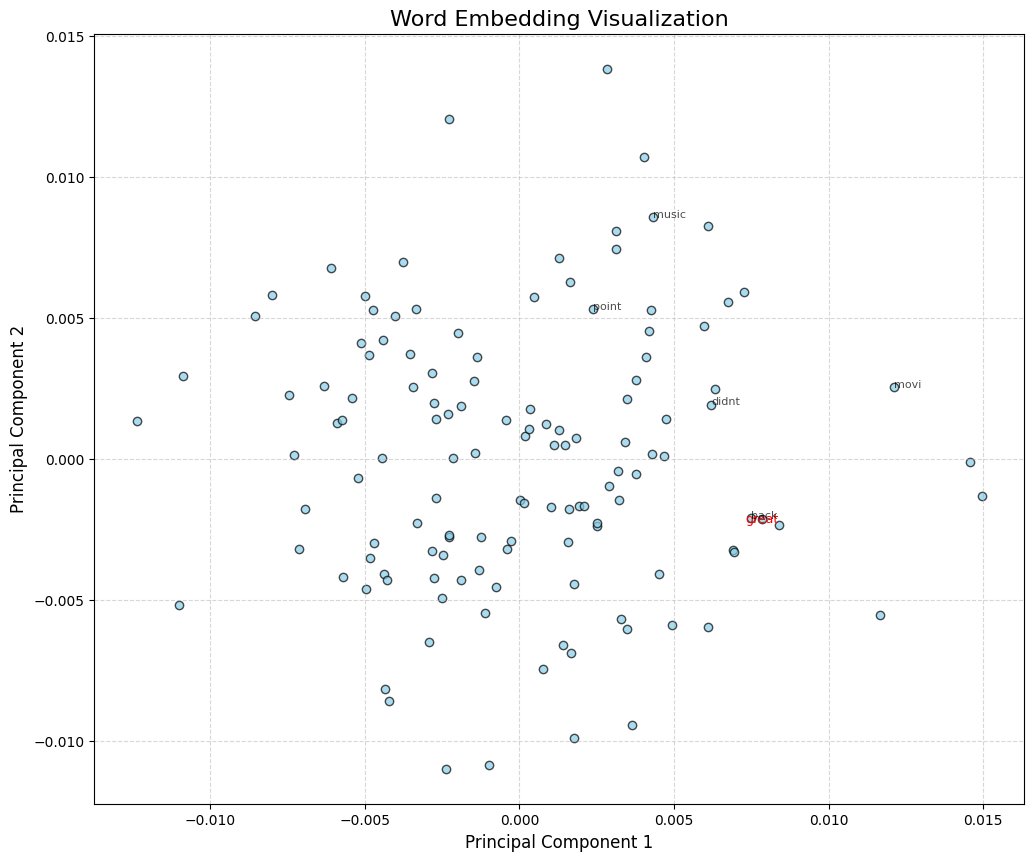

In [ ]:
# Creating a scatter plot of the word vectors with visual enhancements
plt.figure(figsize=(12, 10))
plt.scatter(result[:, 0], result[:, 1], color='skyblue', edgecolor='black', alpha=0.7)

# Annotating points with words, emphasizing a subset of words for better visibility
highlighted_words = ['great', 'interesting', 'exciting', 'positive', 'creative', 'Antman']
for i, word in enumerate(words):
    if word in highlighted_words:
        plt.annotate(word, xy=(result[i, 0], result[i, 1]), color='red', fontsize=9, ha='right', va='bottom')
    elif i % 30 == 0:  # Show every 30th word to avoid clutter
        plt.annotate(word, xy=(result[i, 0], result[i, 1]), fontsize=8, alpha=0.7)

# Adding a grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Adding a title and labels with a larger font size
plt.title('Word Embedding Visualization', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)

# Showing the plot
plt.show()

## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [62]:
# The GitHub link of your final csv file


# Link: https://github.com/AnusreePutta/Info-5731/blob/main/barbie_cleaned_reviews.csv



# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
# Type your answer

The assignment involves tasks in natural language processing (NLP) and text analysis, including data preprocessing, handling NLTK and TextBlob errors, parameter tuning, and time management.
Challenges include data cleaning, troubleshooting errors, parameter optimization, and completing tasks within the allotted time.
Enjoyable aspects include learning opportunities, problem-solving, creativity, and practical skill development.
Adequate time allocation and efficient task prioritization are crucial for successful completion within the provided time frame.